In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import f1_score

outputs = {}

## linear layer 

In [2]:
class Dense():
    def __init__(self, n_x, n_y, seed=1):
        self.n_x = n_x
        self.n_y = n_y
        self.seed = seed
        self.initialize_parameters()

    def initialize_parameters(self):
        """
        Argument:
        self.n_x -- size of the input layer
        self.n_y -- size of the output layer
        self.parameters -- python dictionary containing your parameters:
                           W -- weight matrix of shape (n_x, n_y)
                           b -- bias vector of shape (1, n_y)
        """
        sd = np.sqrt(6.0 / (self.n_x + self.n_y))
        np.random.seed(self.seed)
        # the transpose here is just for the code to be compatible with the old codes
        W = np.random.uniform(-sd, sd, (self.n_y, self.n_x)).T
        b = np.zeros((1, self.n_y))

        assert (W.shape == (self.n_x, self.n_y))
        assert (b.shape == (1, self.n_y))

        self.parameters = {"W": W, "b": b}

    def forward(self, A):
        """
        Implement the linear part of a layer's forward propagation.

        Arguments:
        A -- activations from previous layer (or input data) with the shape (n, f^[l-1])
        self.cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently

        Returns:
        Z -- the input of the activation function, also called pre-activation parameter with the shape (n, f^[l])
        """

        # GRADED FUNCTION: linear_forward
        # START CODE HERE ### (≈ 2 line of code)
        W = self.parameters["W"]
        b = self.parameters["b"]

        Z = np.dot(A, W)+b
        self.cache = (A, W, b)
        ### END CODE HERE ###

        assert (Z.shape == (A.shape[0], self.parameters["W"].shape[1]))

        return Z

    def backward(self, dZ):
        """
        Implement the linear portion of backward propagation for a single layer (layer l)

        Arguments:
        dZ -- Gradient of the loss with respect to the linear output (of current layer l), same shape as Z
        self.cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer
        self.dW -- Gradient of the loss with respect to W (current layer l), same shape as W
        self.db -- Gradient of the loss with respect to b (current layer l), same shape as b

        Returns:
        dA_prev -- Gradient of the loss with respect to the activation (of the previous layer l-1), same shape as A_prev

        """
        A_prev, W, b = self.cache
        m = A_prev.shape[0]
        
        # GRADED FUNCTION: linear_backward
        # START CODE HERE ### (≈ 3 lines of code)
        self.dW = np.dot(A_prev.T, dZ)/m
        self.db = np.sum(dZ, axis=0, keepdims=True)/m
        dA_prev = np.dot(dZ, W.T)
        ### END CODE HERE ###

        assert (dA_prev.shape == A_prev.shape)
        assert (self.dW.shape == self.parameters["W"].shape)
        assert (self.db.shape == self.parameters["b"].shape)

        return dA_prev

    def update(self, learning_rate):
        """
        Update parameters using gradient descent

        Arguments:
        learning rate -- step size
        """

        # GRADED FUNCTION: linear_update_parameters
        # START CODE HERE ### (≈ 2 lines of code)
        self.parameters["W"] = self.parameters["W"]-self.dW*learning_rate
        self.parameters["b"] = self.parameters["b"]-self.db*learning_rate
        ### END CODE HERE ###


## Activation function layer

In [3]:
class Activation():
    def __init__(self, activation_function, loss_function, alpha=None, gamma=None):
        self.activation_function = activation_function
        self.loss_function = loss_function
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, Z):
        if self.activation_function == "sigmoid":
            """
            Implements the sigmoid activation in numpy

            Arguments:
            Z -- numpy array of any shape
            self.cache -- stores Z as well, useful during backpropagation

            Returns:
            A -- output of sigmoid(z), same shape as Z
            """

            # GRADED FUNCTION: sigmoid_forward
            # START CODE HERE ### (≈ 8 lines of code)
            A = 1 / (1+np.exp(-Z))
            self.cache = Z
            ### END CODE HERE ###

            return A
        elif self.activation_function == "relu":
            """
            Implement the RELU function in numpy
            Arguments:
            Z -- numpy array of any shape
            self.cache -- stores Z as well, useful during backpropagation
            Returns:
            A -- output of relu(z), same shape as Z

            """

            # GRADED FUNCTION: relu_forward
            # START CODE HERE ### (≈ 2 lines of code)
            A = np.maximum(0, Z)
            self.cache = Z
            ### END CODE HERE ###

            assert (A.shape == Z.shape)

            return A
        elif self.activation_function == "softmax":
            """
            Implements the softmax activation in numpy

            Arguments:
            Z -- np.array with shape (n, C)
            self.cache -- stores Z as well, useful during backpropagation

            Returns:
            A -- output of softmax(z), same shape as Z
            """

            # GRADED FUNCTION: softmax_forward
            # START CODE HERE ### (≈ 3 lines of code)
            zMax = Z.max(axis=1, keepdims=True)
            A = (np.exp(Z-zMax)) / (np.exp(Z - zMax)).sum(axis=1, keepdims=True)
            self.cache = Z
            ### END CODE HERE ###

            return A
        else:
            assert 0, f"you're using undefined activation function {self.activation_function}"

    def backward(self, dA=None, Y=None):
        if self.activation_function == "sigmoid":
            """
            Implement the backward propagation for a single SIGMOID unit.
            Arguments:
            dA -- post-activation gradient, of any shape
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the loss with respect to Z
            """

            # GRADED FUNCTION: sigmoid_backward
            # START CODE HERE ### (≈ 9 lines of code)
            Z = self.cache
            dZ = dA * (1/(1+np.exp(-Z))) * (1-1/(1+np.exp(-Z)))
            ### END CODE HERE ###

            assert (dZ.shape == Z.shape)

            return dZ

        elif self.activation_function == "relu":
            """
            Implement the backward propagation for a single RELU unit.
            Arguments:
            dA -- post-activation gradient, of any shape
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the loss with respect to Z
            """

            # GRADED FUNCTION: relu_backward
            # START CODE HERE ### (≈ 3 lines of code)
            Z = self.cache
            dZ = np.array(dA, copy=True)
            dZ[Z <= 0] = 0
            ### END CODE HERE ###

            assert (dZ.shape == Z.shape)

            return dZ

        elif self.activation_function == "softmax" and self.loss_function == 'cross_entropy':
            """
            Implement the backward propagation for a [SOFTMAX->CCE LOSS] unit.
            Arguments:
            Y -- true "label" vector (one hot vector, for example: [1,0,0] represents rock, [0,1,0] represents paper, [0,0,1] represents scissors
                                      in a Rock-Paper-Scissors, shape: (n, C)
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the cost with respect to Z
            """

            # GRADED FUNCTION: softmax_CCE_backward
            # START CODE HERE ### (≈ 3 lines of code)
            Z = self.cache
            zMax = Z.max(axis=1, keepdims=True)
            s = np.exp(Z-zMax)/(np.exp(Z-zMax)).sum(axis=1, keepdims=True)
            dZ = s-Y
            ### END CODE HERE ###

            assert (dZ.shape == self.cache.shape)

            return dZ
        elif self.activation_function == "softmax" and self.loss_function == 'focal_loss':
            """
            Implement the backward propagation for a [SOFTMAX->FOCAL LOSS] unit.
            Arguments:
            Y -- true "label" vector (one hot vector, for example: [1,0,0] represents rock, [0,1,0] represents paper, [0,0,1] represents scissors
                                      in a Rock-Paper-Scissors, shape: (n, C)
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the cost with respect to Z
            alpha -- weighting factors correspond to each class, shape: (C,)
            gamma -- modulating factor, a float
            """

            # GRADED FUNCTION: softmax_focalLoss_backward
            # START CODE HERE ### (≈ 10 lines of code)
            epsilon = 1e-5
            Z = self.cache
            n, C = Y.shape
            
            zMax = Z.max(axis=1, keepdims=True)
            s = np.exp(Z-zMax)/(np.exp(Z-zMax)).sum(axis=1, keepdims=True)
           
            dZ_1 = np.zeros_like(Z).astype(float)
            dZ_2 = np.zeros_like(Z).astype(float)
            tLable = np.argmax(Y, axis=1)
            t = s[np.arange(n), np.argmax(Y, axis=1)]
            t = np.tile(t,(C,1)).T
            dZ_1 = np.tile(self.alpha[tLable],(C,1)).T * (self.gamma * (1 - t)**(self.gamma-1) * np.log(t + epsilon) * (t - t**2) - (1 - t)**self.gamma * (1 - t))
            dZ_2 =np.tile(self.alpha[tLable],(C,1)).T  * (self.gamma * (1 - t)**(self.gamma-1) * np.log(t + epsilon) * (-s * t) - (1 - t)**self.gamma * (-s))

            dZ = np.where(Y == 1, dZ_1, dZ_2)
            ## END CODE HERE ###

            assert (dZ.shape == self.cache.shape)

            return dZ


## Model 

In [4]:
class Model():
    def __init__(self, units, activation_functions, loss_function, alpha=None, gamma=None):
        self.units = units
        self.activation_functions = activation_functions
        self.loss_function = loss_function
        self.alpha = alpha
        self.gamma = gamma
        self.initialize_parameters()

    def initialize_parameters(self):
        """
        Arguments:
        self.units -- number of nodes/units for each layer, starting from the input dimension and ending with the output dimension (i.e., [4, 4, 1])
        self.activation_functions -- activation functions used in each layer (i.e, ["relu", "sigmoid"])
        self.loss_function -- ["cross_entropy", "focal_loss"]
        self.alpha -- weighting factors used by focal loss correspond to each class, shape: (C,)
        self.gamma -- a float, used by focal loss
        """
        self.linear = []        # a list to store the dense layers when initializing the model
        # a list to store the activation function layers when initializing the model
        self.activation = []

        for i in range(len(self.units)-1):
            dense = Dense(self.units[i], self.units[i+1], i)
            self.linear.append(dense)

        for i in range(len(self.activation_functions)):
            self.activation.append(Activation(
                self.activation_functions[i], self.loss_function, self.alpha, self.gamma))

    def forward(self, X):
        """
        Arguments:
        X -- input data: shape (n, f)

        Returns:
        A -- output of L-layer neural network, probability vector corresponding to your label predictions, shape (n, C)
        """
        A = X

        # GRADED FUNCTION: model_forward
        # START CODE HERE ### (≈ 4 lines of code)
        A = self.linear[0].forward(A)
        for i in range(1, len(self.linear)):
            A = self.linear[i].forward(self.activation[i-1].forward(A))
        A = self.activation[-1].forward(A)
        ### END CODE HERE ###

        return A

    def backward(self, AL=None, Y=None):
        """
        Arguments:
        For multi-class classification,
        AL -- output of L-layer neural network, probability vector corresponding to your label predictions, shape (n, C)
        Y -- true "label" vector (one hot vector, for example: [1,0,0] represents rock, [0,1,0] represents paper, [0,0,1] represents scissors
                                      in a Rock-Paper-Scissors, shape: (n, C)

        Returns:
        dA_prev -- post-activation gradient
        """

        L = len(self.linear)
        C = Y.shape[1]
        epsilon = 1e-5
        # assertions
        warning = 'Warning: only the following 4 combinations are allowed! \n \
                    1. binary classification: sigmoid + cross_entropy) \n \
                    2. binary classification: softmax + focal_loss) \n \
                    3. multi-class classification: softmax + cross_entropy) \n \
                    4. multi-class classification: softmax + focal_loss)'
        assert self.loss_function in [
            "cross_entropy", "focal_loss"], "you're using undefined loss function!"
        if Y.shape[1] <= 2:                                 # in binary classification
            if self.loss_function == "cross_entropy":
                assert self.activation_functions[-1] == 'sigmoid', warning
                assert self.units[-1] == 1, "you should set last dim to 1 when using sigmoid + cross_entropy in binary classification!"
            elif self.loss_function == "focal_loss":
                assert self.activation_functions[-1] == 'softmax', warning
                assert self.units[-1] == 2, "you should set last dim to 2 when using softmax + focal_loss in binary classification!"
        else:                                               # in multi-class classification
            assert self.activation_functions[-1] == 'softmax', warning
            assert self.units[-1] == Y.shape[
                1], f"you should set last dim to {Y.shape[1]}(the number of classes) in multi-class classification!"

        # GRADED FUNCTION: model_backward
        # START CODE HERE ### (≈ 20 lines of code)

        if self.activation_functions[-1] == "sigmoid":
            if self.loss_function == 'cross_entropy':
                # Initializing the backpropagation
                dAL = -(np.divide(Y,AL+epsilon)-np.divide(1-Y,1-AL+epsilon))

                # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL". Outputs: "dA_prev"
                dZ = self.activation[-1].backward(dAL,Y)
                dA_prev = self.linear[-1].backward(dZ)
        elif self.activation_functions[-1] == "softmax":
            # Initializing the backpropagation
            dZ = self.activation[-1].backward(Y=Y)

            # Lth layer (LINEAR) gradients. Inputs: "dZ". Outputs: "dA_prev"
            dA_prev = self.linear[-1].backward(dZ)

        # Loop from l=L-2 to l=0
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "dA_prev". Outputs: "dA_prev"
        for i in range(L-2,-1,-1):
            dZ = self.activation[i].backward(dA_prev,Y)
            dA_prev = self.linear[i].backward(dZ)
        ### END CODE HERE ###

        return dA_prev

    def update(self, learning_rate):
        """
        Arguments:
        learning_rate -- step size
        """

        L = len(self.linear)

        # GRADED FUNCTION: model_update_parameters
        # START CODE HERE ### (≈ 2 lines of code)
        for i in range(L):
            self.linear[i].update(learning_rate)
        ### END CODE HERE ###


## Loss function 

In [5]:
# GRADED FUNCTION: compute_BCE_loss

def compute_BCE_loss(AL, Y):
    """
    Implement the binary cross-entropy loss function using the above formula.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (n, 1)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (n, 1)

    Returns:
    loss -- binary cross-entropy loss
    """

    n = Y.shape[0]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 line of code)
    loss = np.mean(-Y * np.log(AL+1e-5) - (1 - Y) * np.log(1 - AL+1e-5))
    ### END CODE HERE ###

    loss = np.squeeze(loss)      # To make sure your loss's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(loss.shape == ())

    return loss

In [6]:
# GRADED FUNCTION: compute_CCE_loss

def compute_CCE_loss(AL, Y):
    """
    Implement the categorical cross-entropy loss function using the above formula.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (n, C)
    Y -- true "label" vector (one hot vector, for example: [1,0,0] represents rock, [0,1,0] represents paper, [0,0,1] represents scissors
                                      in a Rock-Paper-Scissors, shape: (n, C)

    Returns:
    loss -- categorical cross-entropy loss
    """

    n = Y.shape[0]

    # Compute loss from aL and y.
    # START CODE HERE ### (≈ 1 line of code)
    loss = -np.mean(np.sum(Y * np.log(AL+1e-5),axis=1))
    ### END CODE HERE ###

    # To make sure your loss's shape is what we expect (e.g. this turns [[17]] into 17).
    loss = np.squeeze(loss)
    assert (loss.shape == ())

    return loss


In [7]:
def compute_focal_loss(AL, Y, alpha, gamma):

    # Compute loss from aL and y.
    ### START CODE HERE ### (10 line of code)
    n,C = Y.shape
    t = np.argmax(Y, axis=1)
    Y = AL[np.arange(n), np.argmax(Y, axis=1)]
    Y = np.tile(Y,(C,1)).T
    loss = -np.mean(np.tile(alpha[t],(C,1)).T * (1 - Y) ** gamma * np.log(Y + 1e-5))
    ### END CODE HERE ###

    loss = np.squeeze(loss)
    assert(loss.shape == ())

    return loss

## Helper function

In [8]:
def predict(x, y_true, model):
    """
    This function is used to predict the results of a  L-layer neural network.

    Arguments:
    x -- data set of examples you would like to label
    model -- trained model

    Returns:
    y_pred -- predictions for the given dataset X
    """

    n = x.shape[0]

    # Forward propagation
    y_pred = model.forward(x)

    # this transform the output and label of binary classification when using sigmoid + cross entropy for evaluation
    # eg. y_pred: [[0.8], [0.2], [0.1]] -> [[0.2, 0.8], [0.8, 0.2], [0.9, 0.1]]
    # eg. y_true: [[1], [0], [0]] -> [[0, 1], [1, 0], [1, 0]]
    if y_pred.shape[-1] == 1:
        y_pred = np.array([[1 - y[0], y[0]] for y in y_pred])
        if y_true is not None:
            y_true = np.array([[1,0] if y == 0 else [0,1] for y in y_true.reshape(-1)])

    # make y_pred/y_true become one-hot prediction result
    # eg. y_true: [[1, 0, 0], [0, 0, 1], [0, 1, 0]] -> [0, 2, 1]
    # eg. y_pred: [[0.2, 0.41, 0.39], [0.1, 0.8, 0.1], [0.1, 0.1, 0.8]] -> [1, 1, 2]
    if y_true is not None:
        y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)

    if y_true is not None:
        # compute accuracy
        correct = 0
        for yt, yp in zip(y_true, y_pred):
            if yt == yp:
                correct += 1
        print(f"Accuracy: {correct/n * 100:.2f}%")

        f1_scores = f1_score(y_true, y_pred, average=None)
        print(f'f1 score score for each class: {f1_scores}')
        print(f'f1_micro score average: {np.mean(np.array(f1_scores)):.2f}')

    return y_pred

### Basic

In [9]:
# load data

# from google.colab import drive
# drive.mount('/content/drive')
# data = np.load('/content/drive/MyDrive/basic_data.npz')
data = np.load('basic_data.npz')

In [10]:
X_train, Y_train = data["x_train"], data["y_train"]
X_test = data["x_test"]

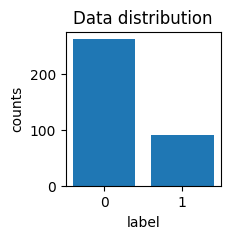

Train: x=(353, 10), y=(353, 1)
Test: x=(89, 10)
x_train: (353, 10) | y_train: (353, 1)
x_val: (0, 10) | y_val: (0, 1)


In [11]:

# plot the data distribution
Y_train_1 = len(['_' for y in Y_train if y == 1])
Y_train_0 = len(['_' for y in Y_train if y == 0])
plt.figure(figsize=(2, 2))
plt.bar([0, 1], [Y_train_0, Y_train_1])
plt.title('Data distribution')
plt.xlabel('label')
plt.ylabel('counts')
plt.show()

print('Train: x=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: x=%s' % (X_test.shape, ))

### START CODE HERE ###
# train_val split
n = X_train.shape[0]
test_size=0
seed = 42
np.random.seed(seed)
shuffle_indices = np.random.permutation(n)
X = X_train[shuffle_indices]
y = Y_train[shuffle_indices]
split_index = int(test_size * X.shape[0])
x_train, y_train = X[split_index:], y[split_index:]
x_val, y_val = X[:split_index], y[:split_index]
### END CODE HERE ###

print("x_train: " + str(x_train.shape) + " | y_train: " + str(y_train.shape))
print("x_val: " + str(x_val.shape) + " | y_val: " + str(y_val.shape))

In [12]:
x_train[:,5] = np.concatenate((np.expand_dims(x_train[:,5],axis=1) ,np.expand_dims(x_train[:,6],axis=1) , np.expand_dims(x_train[:,9],axis=1)),axis=1).mean(axis=1)
x_val[:,5] = np.concatenate((np.expand_dims(x_val[:,5],axis=1) ,np.expand_dims(x_val[:,6],axis=1) , np.expand_dims(x_val[:,9],axis=1)),axis=1).mean(axis=1)
X_test[:,5] = np.concatenate((np.expand_dims(X_test[:,5],axis=1) ,np.expand_dims(X_test[:,6],axis=1) , np.expand_dims(X_test[:,9],axis=1)),axis=1).mean(axis=1)
x_train = np.delete(x_train, [6,9], 1)
x_val= np.delete(x_val, [6,9], 1)
X_test= np.delete(X_test, [6,9], 1)

In [13]:
t = np.zeros_like(x_train[:,0])
for i in range(8):
    t += (x_train[:,i]>0.9)
x_train = x_train[:,][t<4]
y_train = y_train[t<4]

## Training and Evaluation

Loss after iteration 0: 0.198542
Loss after iteration 10000: 0.267874
Loss after iteration 20000: 0.211187
Loss after iteration 30000: 0.203538
Loss after iteration 40000: 0.200156
Loss after iteration 50000: 0.197432
Loss after iteration 60000: 0.194985
Loss after iteration 70000: 0.192253
Loss after iteration 80000: 0.189793
Loss after iteration 90000: 0.187754


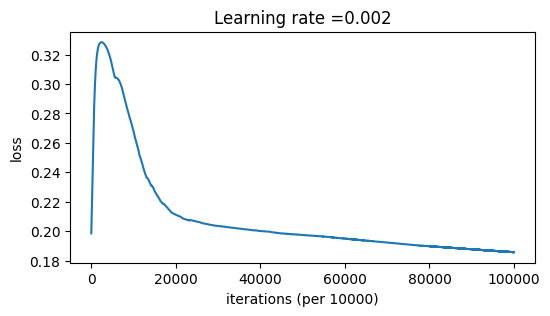

In [14]:
# GRADED CODE: binary classification
### START CODE HERE ###

loss_function = 'cross_entropy'
if loss_function == 'cross_entropy':
    layers_dims = [x_train.shape[1], 7, 5, 1]
    activation_fn = ['relu','relu', 'sigmoid']
    gamma = 3        # you can leave this as it is
    alpha = np.array([0.25, 0.25])        # you can leave this as it is
    y_train_processed = y_train
    y_val_processed = y_val
    assert y_train_processed.shape[-1] == 1, "see the 'Note' in the Basic implementation section"
    assert y_val_processed.shape[-1] == 1, "see the 'Note' in the Basic implementation section"
elif loss_function == 'focal_loss':
    layers_dims = [x_train.shape[1], 5, 2]
    activation_fn = ['relu', 'softmax']
    gamma = 3
    alpha = np.array([0.25, 0.25])
    y_train_processed = np.eye(2)[y_train]
    y_val_processed = np.eye(2)[y_val]
    assert y_train_processed.shape[-1] == 2, "see the 'Note' in the Basic implementation section"
    assert y_val_processed.shape[-1] == 2, "see the 'Note' in the Basic implementation section"

learning_rate = 0.002
num_iterations = 100000
print_loss = True
print_freq = 10000
classes = 2
losses = []                         # keep track of loss
model = Model(layers_dims, activation_fn, loss_function, alpha, gamma)

# Loop (batch gradient descent)
for i in range(0, num_iterations):
    # forward
    AL = model.forward(x_train)
    # compute loss
    if loss_function == 'cross_entropy':
        loss = compute_CCE_loss(AL, y_train)
    elif loss_function == 'focal_loss':
        loss = compute_focal_loss(AL, y_train, alpha, gamma)

    # backward
    dA_prev = model.backward(AL, y_train)

    # update
    model.update(learning_rate)

    losses.append(loss)
    if print_loss and i % print_freq == 0:
        print("Loss after iteration %i: %f" % (i, loss))

# plot the loss
plt.figure(figsize=(6, 3))
plt.plot(np.squeeze(losses))
plt.ylabel('loss')
plt.xlabel(f'iterations (per {print_freq})')
plt.title("Learning rate =" + str(learning_rate))
plt.show()
### END CODE HERE ###


In [15]:
print('training------')
pred_train = predict(x_train, y_train, model)
print('validation------')
# pred_val = predict(x_val, y_val, model)

training------
Accuracy: 84.62%
f1 score score for each class: [0.89772727 0.68965517]
f1_micro score average: 0.79
validation------


In [16]:
pred_test = predict(X_test, None, model)
outputs["basic_pred_test"] = pred_test

### Advanced

In [17]:
# from google.colab import drive
# drive.mount('/content/drive')


In [18]:
# center as anchor
def imgRotate(img,degree):
    rotateMatrix = np.array([[np.cos(degree),-np.sin(degree)],[np.sin(degree),np.cos(degree)]])
    pixel = img.shape
    center = (int(img.shape[0]/2), int(img.shape[1]/2))
    newImg = np.zeros((pixel[0],pixel[1])).astype(float)
    for row in range(pixel[0]):
        for col in range(pixel[1]):
            pos = np.array([row - center[0],col - center[1]])
            pos = np.dot(rotateMatrix,pos) + np.array(center)
            posFloor = np.floor(pos).astype(int)
            posCeil = np.ceil(pos + np.array([1e-8,1e-8])).astype(int)
            if posFloor[0]<pixel[0] and posFloor[1]<pixel[1]:
                newImg[posFloor[0]][posFloor[1]] += (posCeil[0] - pos[0]) * (posCeil[1] - pos[1]) * img[col][row]
            if posCeil[0]<pixel[0] and posFloor[1]<pixel[1]:
                newImg[posCeil[0]][posFloor[1]] += (pos[0] - posFloor[0]) * (posCeil[1] - pos[1]) * img[col][row]
            if posFloor[0]<pixel[0] and posCeil[1]<pixel[1]:
                newImg[posFloor[0]][posCeil[1]] += (posCeil[0] - pos[0]) * (pos[1] - posFloor[1]) * img[col][row]
            if posCeil[0]<pixel[0] and posCeil[1]<pixel[1]:
                newImg[posCeil[0]][posCeil[1]] += (pos[0] - posFloor[0]) * (pos[1] - posFloor[1]) * img[col][row]
    return np.ceil(np.clip(newImg * 1.1,0,255)).astype(int)



In [19]:
def cutImg(img):
    return img[2:-1,4:-4]

In [20]:
# load data
# data = np.load('/content/drive/MyDrive/advanced_data.npz')
data = np.load('advanced_data.npz')
X_train = data["x_train"]
Y_train = data["y_train"]
X_test = data["x_test"]

Train: X=(31065, 28, 28), Y=(31065,)
Test: X=(7767, 28, 28)


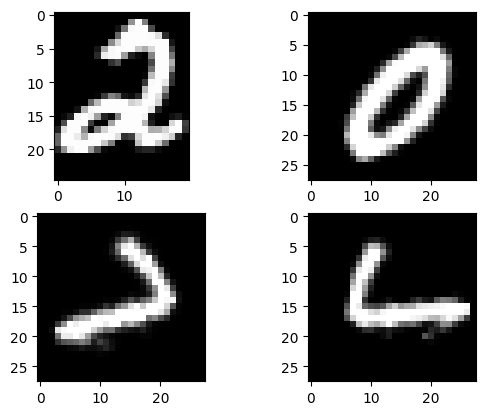

<Figure size 1200x800 with 0 Axes>

In [42]:
# summarize loaded dataset
print(f'Train: X={X_train.shape}, Y={Y_train.shape}')
print(f'Test: X={X_test.shape}')
# plot first few images
# for i in range(9):
# 	# define subplot
# 	plt.subplot(330 + 1 + i)
# 	# plot raw pixel data
# 	plt.imshow(X_train[i], cmap='gray', vmin=0, vmax=255)
plt.subplot(221)
plt.imshow(X_train[np.random.randint(0,31065)][2:-1,4:-4], cmap='gray', vmin=0, vmax=255)
plt.subplot(222)
plt.imshow(imgRotate(X_train[30000],np.radians(15)), cmap='gray', vmin=0, vmax=255)
plt.subplot(223)
plt.imshow(imgRotate(imgRotate(X_train[2000],np.radians(30)),np.radians(-30)), cmap='gray', vmin=0, vmax=255)
plt.subplot(224)
plt.imshow(imgRotate(X_train[2000],np.radians(-10)), cmap='gray', vmin=0, vmax=255)
plt.figure(figsize=(12,8))
plt.show()


### Create image by rotation
Add each number to 5000

In [716]:
# create 9 img (x10)
newImgs = []
newY = []
filt = X_train[Y_train == 9]
for img in filt:
    for degree in range(-18,37,6):
        if degree != 0:
            newImg = imgRotate(img, np.radians(degree))
            newImgs.append(newImg)
            newY.append(9)
Y_train = np.append(Y_train,newY)
X_train = np.concatenate((X_train,newImgs))

# create 8 img (x5)
newImgs = []
newY = []
filt = X_train[Y_train == 8]
for img in filt:
    for degree in range(-16,17,8):
        if degree != 0:
            newImg = imgRotate(img, np.radians(degree))
            newImgs.append(newImg)
            newY.append(8)
Y_train = np.append(Y_train,newY)
X_train = np.concatenate((X_train,newImgs))

# create 7 img (x3)
newImgs = []
newY = []
filt = X_train[Y_train == 7]
for img in filt:
    for degree in range(-10,21,30):
        if degree != 0:
            newImg = imgRotate(img, np.radians(degree))
            newImgs.append(newImg)
            newY.append(7)
Y_train = np.append(Y_train,newY)
X_train = np.concatenate((X_train,newImgs))

# create 6 img (x3)
newImgs = []
newY = []
filt = X_train[Y_train == 6]
for img in filt:
    for degree in range(-10,21,30):
        if degree != 0:
            newImg = imgRotate(img, np.radians(degree))
            newImgs.append(newImg)
            newY.append(6)
newImgs = np.array(newImgs)            
np.random.shuffle(np.array(newImgs))
Y_train = np.append(Y_train,newY[:3400])
X_train = np.concatenate((X_train,newImgs[:3400]))

# create 5 img
newImgs = []
newY = []
filt = X_train[Y_train == 5]
for img in filt:
    newImg = imgRotate(img, np.radians(15))
    newImgs.append(newImg)
    newY.append(5)
Y_train = np.append(Y_train,newY)
X_train = np.concatenate((X_train,newImgs))


# create 4 img
newImgs = []
newY = []
filt = X_train[Y_train == 4]
for img in filt:
    newImg = imgRotate(img, np.radians(15))
    newImgs.append(newImg)
    newY.append(4)
X_train = np.concatenate((X_train,newImgs[:2300]))
Y_train = np.append(Y_train,newY[:2300])

# create 3 img
newImgs = []
newY = []
filt = X_train[Y_train == 3]
for img in filt:
    newImg = imgRotate(img, np.radians(15))
    newImgs.append(newImg)
    newY.append(3)
X_train = np.concatenate((X_train,newImgs[:1600]))
Y_train = np.append(Y_train,newY[:1600])

# create 2 img
newImgs = []
newY = []
filt = X_train[Y_train == 2]
for img in filt:
    newImg = imgRotate(img, np.radians(15))
    newImgs.append(newImg)
    newY.append(2)
Y_train = np.append(Y_train,newY[:1000])    
X_train = np.concatenate((X_train,newImgs[:1000]))

In [717]:
# cut image
newImgs = []
for img in X_train:
    newImgs.append(cutImg(img))
X_train = np.array(newImgs)
newImgs = []
for img in X_test:
    newImgs.append(cutImg(img))
X_test = np.array(newImgs)


In [718]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

(54727, 25, 20)
(7767, 25, 20)
(54727,)


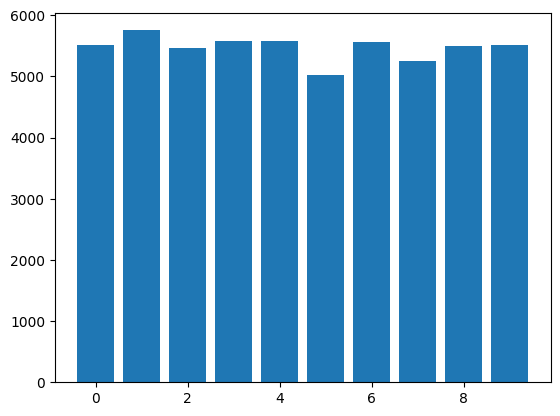

In [719]:
# show dataset
unique, counts = np.unique(Y_train, return_counts=True)
plt.bar(list(range(10)),counts)
plt.show()

In [720]:
# GRADED CODE: multi-class classification (Data preprocessing) one-hot encoding for y
### START CODE HERE ###
Y_train = np.eye(10)[Y_train]
### END CODE HERE ###

print("shape of X_train: " + str(X_train.shape))
print("shape of Y_train: " + str(Y_train.shape))
print("shape of X_test: " + str(X_test.shape))

# GRADED CODE: multi-class classification (Data preprocessing)	normalize x
### START CODE HERE ###
X_train = (X_train/255).reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test = (X_test/255).reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
### END CODE HERE ###

print("\nshape of X_train: " + str(X_train.shape))
print("shape of Y_train: " + str(Y_train.shape))
print("shape of X_test: " + str(X_test.shape))

shape of X_train: (54727, 25, 20)
shape of Y_train: (54727, 10)
shape of X_test: (7767, 25, 20)

shape of X_train: (54727, 500)
shape of Y_train: (54727, 10)
shape of X_test: (7767, 500)


In [721]:
# You can split training and validation set here and visualize their distribution. (Optional)
# If not, just leave this as it is
### START CODE HERE ###
n = X_train.shape[0]
test_size=0
seed = 42
np.random.seed(seed)
shuffle_indices = np.random.permutation(n)
X = X_train[shuffle_indices]
y = Y_train[shuffle_indices]
split_index = int(test_size * X.shape[0])
x_train, y_train = X[split_index:], y[split_index:]
x_val, y_val = X[:split_index], y[:split_index]

print("shape of x_train: " + str(x_train.shape))
print("shape of y_train: " + str(y_train.shape))
### END CODE HERE ###



shape of x_train: (54727, 500)
shape of y_train: (54727, 10)


## Training and Evaluation

Loss after iteration 0: 2.304071
Loss after iteration 500: 0.562926
Loss after iteration 1000: 0.426051
Loss after iteration 1500: 0.371657
Loss after iteration 2000: 0.342399
Loss after iteration 2500: 0.311035
Loss after iteration 3000: 0.297913
Loss after iteration 3500: 0.279812
Loss after iteration 4000: 0.268604
Loss after iteration 4500: 0.258081
Loss after iteration 5000: 0.248139
Loss after iteration 5500: 0.237863
Loss after iteration 6000: 0.231412
Loss after iteration 6500: 0.225864
Loss after iteration 7000: 0.219408
Loss after iteration 7500: 0.211468
Loss after iteration 8000: 0.206895
Loss after iteration 8500: 0.201930
Loss after iteration 9000: 0.195475
Loss after iteration 9500: 0.190708


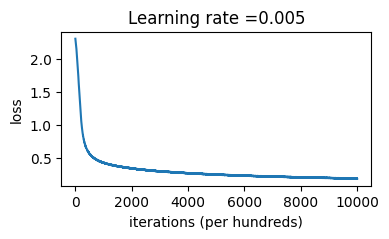

In [722]:
# GRADED CODE: multi-class classification
### START CODE HERE ###
def random_mini_batches(X, Y, mini_batch_size = 64):
    """
    Creates a list of random minibatches from (X, Y)

    Arguments:
    X -- input data, of shape (n, f^{0})
    Y -- true "label" vector, of shape (n, C)
    mini_batch_size -- size of the mini-batches, integer

    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """

    m = X.shape[0]                  # number of training examples
    mini_batches = []

    # Step 1: Shuffle (X, Y)
    permutation = np.random.permutation(m)
    shuffled_X = X[permutation]
    shuffled_Y = Y[permutation]
    # Step 2 - Partition (shuffled_X, shuffled_Y).
    # Cases with a complete mini batch size only i.e each of 64 examples.
    num_complete_minibatches = math.floor(m / mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        # (approx. 2 lines)
        mini_batch_X = shuffled_X[k*mini_batch_size:(k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[k*mini_batch_size:(k+1)*mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # For handling the end case (last mini-batch < mini_batch_size i.e less than 64)
    if m % mini_batch_size != 0:
        #(approx. 2 lines)
        mini_batch_X = shuffled_X[num_complete_minibatches*mini_batch_size:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches*mini_batch_size:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches


layers_dims = [x_train.shape[1],20,20,10]
activation_fn = ['relu','relu','softmax']
learning_rate = 0.005
num_iterations = 10000
batch_size = 16384
classes = 10
losses = []                         # keep track of loss
print_loss = True
print_freq = 500
loss_function = "cross_entropy"
gamma = None
alpha = None
model = Model(layers_dims, activation_fn, loss_function, alpha=alpha, gamma=gamma)

# Loop (gradient descent)
for i in range(0, num_iterations):
    mini_batches = random_mini_batches(x_train, y_train, batch_size)
    loss = 0
    for batch in mini_batches:
        x_batch, y_batch = batch
        
        # forward
        AL = model.forward(x_batch)

        # compute loss
        if loss_function == 'cross_entropy':
            loss += compute_CCE_loss(AL,y_batch)
        elif loss_function == 'focal_loss':
            loss += compute_focal_loss(AL,y_batch,alpha,gamma)

        # backward
        dA_prev = model.backward(AL,y_batch)
        # update
        model.update(learning_rate)

    loss /= len(mini_batches)
    losses.append(loss)
    if print_loss and i % print_freq == 0:
        print ("Loss after iteration %i: %f" %(i, loss))


# plot the loss
plt.figure(figsize=(4, 2))
plt.plot(np.squeeze(losses))
plt.ylabel('loss')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()
### END CODE HERE ###

In [723]:
pred_train = predict(x_train, y_train, model)

Accuracy: 94.45%
f1 score score for each class: [0.96656425 0.97258497 0.93686242 0.93534678 0.94006422 0.93774436
 0.95265423 0.94645248 0.92646925 0.92828219]
f1_micro score average: 0.94


In [ ]:
#You can check for your validation accuracy here. (Optional)
### START CODE HERE ###
None
### END CODE HERE ###

In [724]:
pred_test = predict(X_test, None, model)
outputs["advanced_pred_test"] = pred_test

# Submit prediction

In [ ]:
# sanity check
assert list(outputs.keys()) == ['basic_pred_test','advanced_pred_test'],\
"You're missing something, please restart the kernel and run the code from begining to the end. If the same error occurs, maybe you deleted some outputs, check the template to find the missing parts!"

In [726]:
np.save("output_bonus.npy", outputs)

In [47]:
# sanity check
submit = np.load("output_bonus.npy", allow_pickle=True).item()
for key, value in submit.items():
  print(str(key) + ": " + str(type(value)))

basic_pred_test: <class 'numpy.ndarray'>
advanced_pred_test: <class 'numpy.ndarray'>


Expected output: <br>
<small>
basic_pred_test： <class 'numpy.ndarray'> <br>
advanced_pred_test： <class 'numpy.ndarray'> <br>
</small>